In [1]:
import pandas as pd 

# Ruta al archivo CSV
ruta_csv = r'C:\repositorio\TFM_KSCHOOL\Raul\Trabajando_Con_Cositas_Luis\refactorizando_codigo_v4(In_Progress)\palas_procesadas.csv'

# Paso 1: Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Paso 2: Verificar las primeras filas del DataFrame cargado para asegurarse de que todo está bien
print(df.head())



                         Palas    Precio        Marca            Color  \
0              HARLEM EUPHORIA   63,95 €      No data     negro, verde   
1    VARLION LW DIFUSOR W 2021  149,95 €      varlion      negro, rosa   
2  DUNLOP BOOST LITE 2.0 WOMAN  109,00 €  black crown      negro, azul   
3    BLACK CROWN PITON 11 2023   86,95 €       dunlop             rosa   
4           SIUX FURTIVE PRO 2   62,95 €         siux  negro, amarillo   

  Producto      Balance    Nucleo                      Cara   Dureza  \
0    palas  alto, medio  soft eva                   No data  No data   
1    palas         bajo  soft eva                   No data  No data   
2    palas         bajo       eva  carbono, fibra de vidrio  No data   
3    palas         bajo  soft eva           fibra de vidrio   blanda   
4    palas        medio  soft eva           fibra de vidrio  No data   

              Nivel de Juego  Acabado    Forma Superficie Tipo de Juego  \
0     avanzado / competición  No data  No data 

In [ ]:
#Tratamiento de los Datos

#Eliminacion de las columnas por excesiva aparicion de "No Data"
df = df.drop(['Producto', 'Acabado'], axis=1)

#----------------------------------------------------------------------------------------------------------------------------------------

#PRECIO
#Limpiamos la columna Precio y le cambiamos el formato para quitar tanto la ',' para los decimales como el '€' para las unidades
df['Precio'] = df['Precio'].apply(lambda x: float(x.replace('€', '').replace(',', '.').strip()))

#-----------------------------------------------------------------------------------------------------------------------------------------

#BALANCE

# Ver los valores únicos en la columna 'Balance'
df['Balance'].unique()

# Suponiendo que ya tienes el DataFrame df
# Ejemplo de cómo sería la columna Balance
'''df['Balance'] = pd.DataFrame({
    'Balance': ['alto, medio', 'bajo', 'medio', 'alto', 'medio, bajo', 
                'principiante / intermedio', 'No data', 'avanzado / competición, principiante / intermedio']
})'''

# Aplicamos la función lambda para transformar los valores
df['Balance'] = df['Balance'].apply(lambda x: 
     x if x == 'medio' or x == 'alto' or x == 'bajo'                               
    else 'medio' if 'principiante' in x or 'intermedio' in x 
    else 'alto' if 'avanzado' in x or 'competición' in x 
    else 'No data')

#--------------------------------------------------------------------------------------------------------------------------------------------

#NUCLEO

'''df['Nucleo'] = pd.DataFrame({
    'Nucleo': ['soft eva', 'eva', 'ultrasoft eva', 'hard eva', 'No data',
       'black eva', 'medium eva', 'supersoft eva', 'foam', 'multieva',
       'black eva hr3', 'eva, polietileno', 'black eva hr9',
       'black eva, soft eva']
})'''

#Ajuste de los valores de la columna "Nucleo" para que adapten solo uno de los siguientes valores : 'soft eva','foam','hard eva','medium eva',No data'
#Se ha buscado simplificar la cantidad de materiales que habia en dicha columna unificando esos valores a 5 posibles

df['Nucleo'] = df['Nucleo'].apply(lambda x: 
    x if x == 'soft eva' or x == 'medium eva' or x == 'hard eva' or x == 'foam'
    else 'soft eva' if 'ultrasoft eva' in x or 'black eva, soft eva' in x or 'supersoft eva' in x
    else 'foam' if 'eva, polietileno' in x 
    else 'hard eva' if 'black eva hr9' in x 
    else 'medium eva' if 'black eva hr3' in x or 'eva' in x or 'multieva' in x
    else 'No data'  # Para valores que no coincidan con ninguna condición
)

#--------------------------------------------------------------------------------------------------------------------------------------------------

#CARA

#Valores unicos de la columna Cara
'''df['Cara'] = pd.DataFrame({
    'Cara': ['No data', 'carbono, fibra de vidrio', 'fibra de vidrio',
       'carbono 12k, fibra de vidrio', 'fibra de carbono',
       'fibra de vidrio, carbono 15k']
})'''

#Reduccion de los valores unicos de la columna Cara a los siguientes 3: 'fibra de carbono', 'fibra de vidrio' , 'mix'

df['Cara'] = df['Cara'].apply(lambda x: 
    x if x == 'fibra de carbono' or x == 'fibra de vidrio' 
    else 'mix' if 'carbono 12k, fibra de vidrio' in x or 'fibra de vidrio, carbono 15k' in x or 'carbono, fibra de vidrio' in x
    else 'No data')

#-------------------------------------------------------------------------------------------------------------------------------------------------

#DUREZA

#Valores unicos de la columna Dureza

'''df['Dureza'] = pd.DataFrame({
    'Dureza': ['No data', 'blanda', 'media', 'dura', 'media, blanda',
       'dura, media']
})'''

#Aqui lo que se busca es que tengamos solo 4 valores unicos : 'No data','blanda','media','dura'

df['Dureza'] = df['Dureza'].apply(lambda x: 
    x if x == 'media' or x == 'blanda' or x == 'dura'
    else 'dura' if 'dura, media'in x 
    else 'blanda' if 'media, blanda' in x 
    else 'No data')

#--------------------------------------------------------------------------------------------------------------------------------------------------

#NIVEL DE JUEGO

#Valores unicos de la columna Nivel de Juego

'''df['Nivel de Juego'] = pd.DataFrame({
    'Nivel de Juego': ['avanzado / competición', 'principiante / intermedio',
       'avanzado / competición, profesional', 'profesional',
       'principiante / intermedio, profesional', 'No data',
       'avanzado / competición, principiante / intermedio']
})'''


#Aqui lo que se busca es que tengamos solo 4 valores unicos : 'avanzado', 'principiante', 'pro', 'No data'

df['Nivel de Juego'] = df['Nivel de Juego'].apply(lambda x: 
    x if x == 'No data' else
    'pro' if 'profesional' in x else
    'avanzado' if 'avanzado / competición' in x or 'avanzado / competición, profesional' in x or 'principiante / intermedio, profesional' in x else
    'principiante' if 'principiante / intermedio' in x else
    None 
)

#----------------------------------------------------------------------------------------------------------------------------------------------------

#TIPO DE JUEGO

'''df['Tipo de Juego'] = pd.DataFrame({
    'Tipo de Juego': ['No data', 'control', 'polivalente', 'potencia',
       'control, potencia']
})'''

#Aqui lo que se busca es que tengamos solo 4 valores unicos : 'No data', 'control', 'polivalente', 'potencia'
df['Tipo de Juego'] = df['Tipo de Juego'].apply(lambda x:
x if x == 'control' or x == 'polivalente' or x == 'potencia'
else 'polivalente' if 'control, potencia' in x
else 'No data' )

#JUGADOR

#Vamos a tener tres tipos de valores unicos en la columna: 'hombre', 'mujer' y 'junior'
df['Jugador'] = df['Jugador'].apply(lambda x:
x if x == 'hombre' or x == 'mujer' or x == 'junior'
else 'mixta' if 'hombre, mujer' in x
else 'No data')




KeyError: "['Producto', 'Acabado'] not found in axis"

In [15]:
df['Jugador'].unique()

array(['hombre, mujer', 'mujer', 'junior', 'hombre', 'No data'],
      dtype=object)

In [16]:
df['Jugador'] = df['Jugador'].apply(lambda x:
x if x == 'hombre' or x == 'mujer' or x == 'junior'
else 'mixta' if 'hombre, mujer' in x
else 'No data')

In [17]:
df.dtypes

Palas              object
Precio            float64
Marca              object
Color              object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [18]:
def mostrar_variables_columnas(df):
    """
    Muestra las variables únicas presentes en cada columna del DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame a analizar.

    Returns:
    - dict: Un diccionario donde las claves son los nombres de las columnas y
            los valores son listas de las variables únicas en cada columna.
    """
    variables_por_columna = {}
    for columna in df.columns:
        variables_por_columna[columna] = df[columna].unique().tolist()
        print(f"Columna: {columna}")
        print(f"Variables: {variables_por_columna[columna]}")
        print("-" * 40)
    return variables_por_columna

# Usar la función con tu DataFrame
variables = mostrar_variables_columnas(df)

Columna: Palas
Variables: ['HARLEM EUPHORIA', 'VARLION LW DIFUSOR W 2021', 'DUNLOP BOOST LITE 2.0 WOMAN', 'BLACK CROWN PITON 11 2023', 'SIUX FURTIVE PRO 2', 'ADIDAS ADIPOWER JUNIOR 3.3', 'VARLION BOURNE PRISMA RADIO', 'MYSTICA QUICKSTART HYBRID BLUE 2024', 'SIUX ELECTRA ST3 LITE', 'DUNLOP TITAN 2.0 AMARILLA AZUL', 'RS PADEL COBRA APEX EDITION NEGRO GRIS MUJER', 'SIUX PEGASUS REVOLUTION 2', 'SIUX PEGASUS 1K LIMITED EDITION', 'BLACK CROWN PITON ATTACK PLUS', 'RS COBRA APEX EDITION WOMEN GREEN', 'HEAD SPEED JUNIOR 2023', 'BLACK CROWN SPECIAL SOFT 2023', 'STARVIE AQUILA SPACE SPEED 2.0 2023', 'VARLION BOURNE CARBON 2 PRISMA', 'DUNLOP AERO-STAR LITE', 'DUNLOP NEMESIS CARBON', 'BABOLAT AIR VIPER 2024', 'BLACK CROWN WOLF', 'SIUX ELECTRA ST2 CONTROL RACKET', 'WILSON BELA PRO PADEL 2', 'HEAD CHALLENGE AZUL VERDE', 'NOX AT10 GENIUS 12K BY AGUSTÍN TAPIA EX', 'HEAD CALIBRE ROSA', 'DUNLOP TITAN KILLER 2.0 2024', 'SIUX PEGASUS REVOLUTION 12K', 'HEAD GRAPHENE 360 ALPHA CONTROL', 'HEAD SPEED PRO X 202

In [19]:
import pandas as pd

def labelizar_columnas(df, columnas, label_mapping):
    """
    Labeliza las columnas del DataFrame según un mapeo especificado para cada columna.
    
    Args:
    - df (pd.DataFrame): El DataFrame a procesar.
    - columnas (list): Lista de nombres de columnas a labelizar.
    - label_mapping (dict): Diccionario donde cada clave es el nombre de una columna,
      y el valor es otro diccionario que mapea los valores originales a etiquetas numéricas.
      
    Returns:
    - pd.DataFrame: El DataFrame con las columnas labelizadas.
    """
    df = df.copy()  # Evitar modificar el DataFrame original
    
    for columna in columnas:
        if columna in label_mapping:
            # Añadir 'No data': 0 si no está en el mapeo
            if "No data" not in label_mapping[columna]:
                label_mapping[columna]["No data"] = 0
            # Reemplazar valores según el mapeo
            df[columna] = df[columna].map(label_mapping[columna])
    
    return df

In [20]:
# Especificar el mapeo de etiquetas basado en las variables proporcionadas
label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
}

In [21]:

# Aplicar la función
df_labelizado = labelizar_columnas(df, df.columns, label_mapping)

print(df_labelizado)


                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

In [22]:
def calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel):
    """
    Calcula los scores de lesión y nivel para cada fila en un DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame original con las columnas ya labelizadas.
    - peso_lesion (dict): Diccionario con los pesos de lesión para cada columna.
    - peso_nivel (dict): Diccionario con los pesos de nivel para cada columna.
    - score_lesion (dict): Diccionario con los scores de lesión para cada variable de cada columna.
    - score_nivel (dict): Diccionario con los scores de nivel para cada variable de cada columna.

    Returns:
    - pd.DataFrame: Un nuevo DataFrame con las columnas 'score_lesion' y 'score_nivel'.
    """
    df_scored = df_labelizado.copy()  # Copia del DataFrame original para no modificarlo directamente

    # Inicializamos las columnas de score en 0
    df_scored["score_lesion"] = 0
    df_scored["score_nivel"] = 0

    for columna in df.columns:
        if columna in peso_lesion:
            # Multiplicamos los scores de lesión y nivel por sus respectivos pesos
            df_scored["score_lesion"] += df_scored[columna].map(score_lesion.get(columna, {})) * peso_lesion[columna]
        if columna in peso_nivel:
            df_scored["score_nivel"] += df_scored[columna].map(score_nivel.get(columna, {})) * peso_nivel[columna]

    return df_scored


# Pesos de lesión para cada columna
peso_lesion = {
    "Balance": 1.5,
    "Nucleo": 1.5,
    "Cara": 1.2,
    "Dureza": 1.5,
    "Nivel de Juego": 1,
    "Forma": 1,
    "Superficie": 1,
    "Tipo de Juego": 1.5,
}

# Pesos de nivel para cada columna
peso_nivel = {
    "Balance": 1.5,
    "Nucleo": 1.2,
    "Cara": 1.0,
    "Dureza": 1.2,
    "Nivel de Juego": 2.0,
    "Forma": 1.5,
    "Superficie": 1.2,
    "Tipo de Juego": 1.5,
}


""" label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
} """


# Scores de lesión para cada variable en cada columna
score_lesion = {
    "Balance": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nucleo": {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
    "Cara": {0: 0, 1: 1, 2: 2, 3: 3},
    "Dureza": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nivel de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
    "Forma": {0: 0, 1: 1, 2: 2, 3: 3},
    "Superficie": {0: 0, 1: 1, 2: 2},
    "Tipo de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
}

# Scores de nivel para cada variable en cada columna
score_nivel = {
    "Balance": {0: 0, 1: 1, 2: 3, 3: 5},
    "Nucleo": {0: 0, 1: 2, 2: 4, 3: 6, 4: 8},
    "Cara": {0: 0, 1: 2, 2: 4, 3: 6},
    "Dureza": {0: 0, 1: 2, 2: 4, 3: 6},
    "Nivel de Juego": {0: 0, 1: 1, 2: 3, 3: 5},
    "Forma": {0: 0, 1: 2, 2: 4, 3: 6},
    "Superficie": {0: 0, 1: 2, 2: 4},
    "Tipo de Juego": {0: 0, 1: 2, 2: 4, 3: 6},
}

# Calcular scores
df_scored = calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel)

print(df_scored)


                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

In [23]:
from sklearn.preprocessing import MinMaxScaler

def escalar_columnas(df, columnas_a_escalar):
    """
    Escala las columnas seleccionadas usando MinMaxScaler (0 a 1).
    
    Args:
    - df (pd.DataFrame): DataFrame con las columnas a escalar.
    - columnas_a_escalar (list): Lista de nombres de las columnas a escalar.
    
    Returns:
    - pd.DataFrame: DataFrame con las columnas escaladas.
    """
    scaler = MinMaxScaler()  # Escalador para normalizar entre 0 y 1
    df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])
    return df

# Lista de columnas a escalar
columnas_a_escalar = ["score_lesion", "score_nivel"]

# Escalar las columnas en df_scored
df_scaled = escalar_columnas(df_scored, columnas_a_escalar)

print(df_scaled)


                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

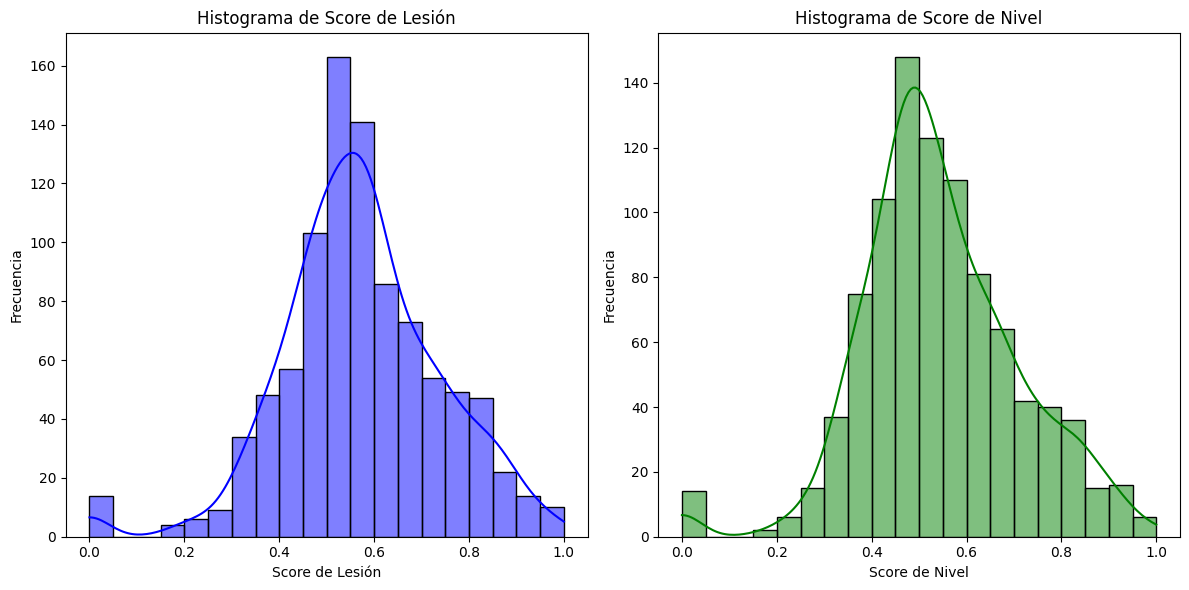

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_labelizado contiene las columnas score_lesion y score_nivel
# Ejemplo de cómo generar el histograma:

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 6))

# Histograma para score_lesion
plt.subplot(1, 2, 1)  # (filas, columnas, índice del gráfico)
sns.histplot(df_scaled['score_lesion'], kde=True, color='blue', bins=20)
plt.title('Histograma de Score de Lesión')
plt.xlabel('Score de Lesión')
plt.ylabel('Frecuencia')

# Histograma para score_nivel
plt.subplot(1, 2, 2)  # (filas, columnas, índice del gráfico)
sns.histplot(df_scaled['score_nivel'], kde=True, color='green', bins=20)
plt.title('Histograma de Score de Nivel')
plt.xlabel('Score de Nivel')
plt.ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


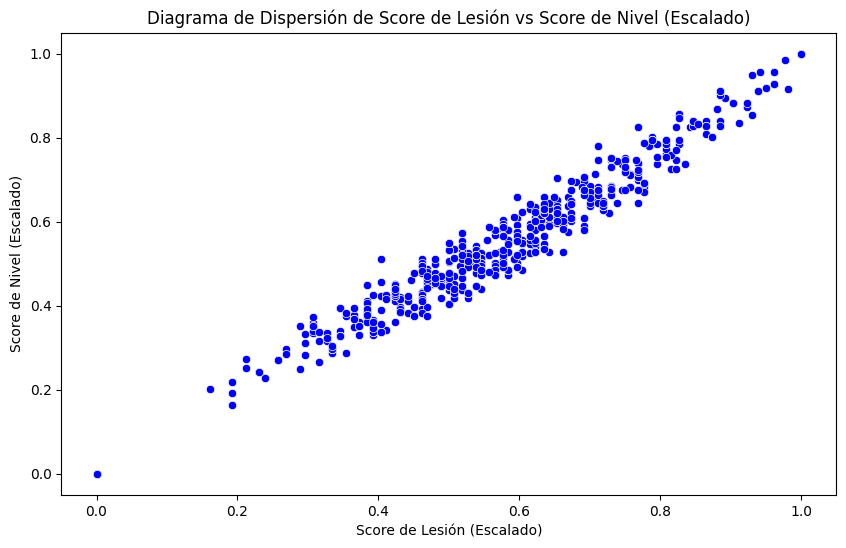

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_scaled contiene las columnas score_lesion y score_nivel
# Diagrama de dispersión para los valores de score_lesion y score_nivel en df_scaled:

# Configuración de tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagrama de dispersión para los valores de score_lesion y score_nivel
sns.scatterplot(x=df_scaled['score_lesion'], y=df_scaled['score_nivel'], color='blue')

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión de Score de Lesión vs Score de Nivel (Escalado)')
plt.xlabel('Score de Lesión (Escalado)')
plt.ylabel('Score de Nivel (Escalado)')

# Mostrar el gráfico
plt.show()


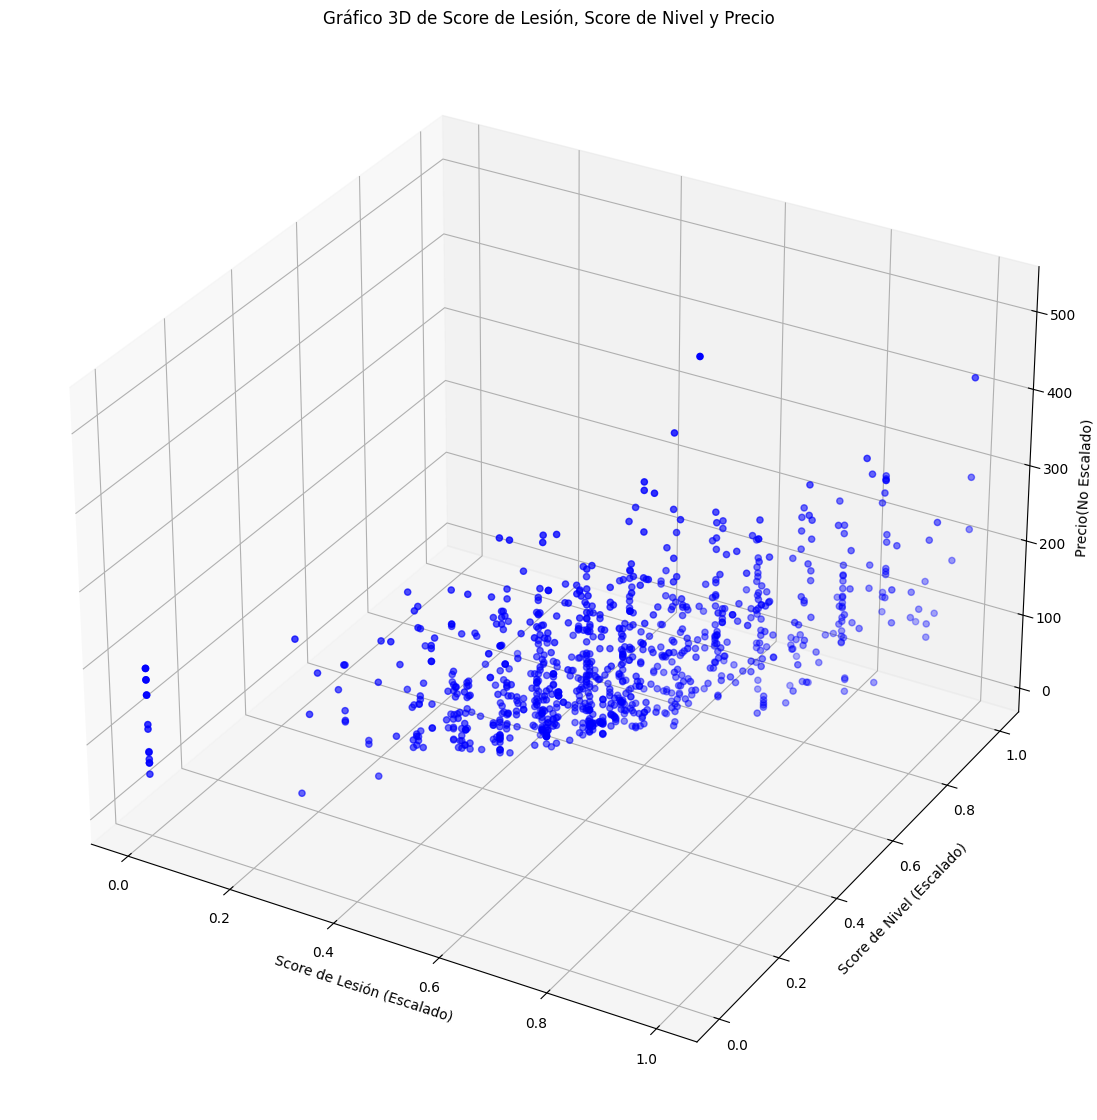

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Asegúrate de que df_scaled contiene las columnas score_lesion, score_nivel y la tercera variable (por ejemplo, 'score_tercero')

# Crear figura
fig = plt.figure(figsize=(20, 14))

# Crear un gráfico en 3D
ax = fig.add_subplot(111, projection='3d')

# Definir los valores de cada eje (score_lesion, score_nivel y otra variable)
x = df_scaled['score_lesion']
y = df_scaled['score_nivel']
z = df_scaled['Precio']  # Aquí puedes cambiar a cualquier otra columna de interés para el eje Z

# Crear el gráfico de dispersión 3D
ax.scatter(x, y, z, color='blue')

# Añadir etiquetas a los ejes
ax.set_xlabel('Score de Lesión (Escalado)')
ax.set_ylabel('Score de Nivel (Escalado)')
ax.set_zlabel('Precio' '(No Escalado)')

# Título del gráfico
ax.set_title('Gráfico 3D de Score de Lesión, Score de Nivel y Precio')

# Mostrar el gráfico
plt.show()
